<a href="https://colab.research.google.com/github/bala-codes/Yolo-v5_Object_Detection_Blood_Cell_Count/blob/master/codes/2.%20Yolo-v5%20BCC%20Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os, sys, random
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
% cd /content/drive/My Drive/supergate/Yolo_Detection/codes
% ls

!pip install -qr 'requirements.txt'  # install dependencies

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/supergate/Yolo_Detection/codes
'1. Yolo-V5 BCC Training & Testing.ipynb'           hubconf.py
'1. Yolo-V5 HOOK-HELMET Training & Testing.ipynb'   inference/
'2. Yolo-v5 BCC Inference.ipynb'                    models/
'2. Yolo-v5 HOOK Inference.ipynb'                   __pycache__/
 bcc-kaggle.yaml                                    requirements.txt
 blood_cell_detection.csv                           runs/
 data/                                              test.py
 detect.py                                          train.py
 helmet_df.csv                                      utils/
 helmet.yaml                                        weights/
 hook_detection.csv                                 yolov5s.pt
 hook.yaml                                          yolov5s.yaml


#**NECCESSARY FILES FOR DETECTION AND LATER ADD THIS PATH TO THE SYSTEM VARIABLE**

<img src="https://github.com/bala-codes/Yolo-v5_Object_Detection_Blood_Cell_Count/blob/master/imgs/Dependency_files.PNG?raw=true" width="200%">




In [ ]:
## Add the path where you have stored the neccessary supporting files to run detect.py ##
# sys.path.insert(0, '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/')
# print(sys.path)
# cwd = os.getcwd()
# print(cwd)

['/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/', '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE_CODES/', '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE_CODES/', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
/content


## Single Image predictions

In [ ]:
# ! ls ../imgs/images/valid/
! ls ../data-preprocessed/helmet/images/valid/

00003.jpg  00510.jpg  00940.jpg  01367.jpg  01830.jpg  02386.jpg  02905.jpg
00005.jpg  00511.jpg  00943.jpg  01370.jpg  01833.jpg  02388.jpg  02911.jpg
00010.jpg  00514.jpg  00944.jpg  01371.jpg  01834.jpg  02390.jpg  02912.jpg
00011.jpg  00515.jpg  00945.jpg  01372.jpg  01840.jpg  02391.jpg  02917.jpg
00013.jpg  00516.jpg  00946.jpg  01373.jpg  01843.jpg  02392.jpg  02923.jpg
00019.jpg  00518.jpg  00947.jpg  01374.jpg  01845.jpg  02396.jpg  02930.jpg
00020.jpg  00521.jpg  00948.jpg  01375.jpg  01853.jpg  02397.jpg  02936.jpg
00021.jpg  00523.jpg  00950.jpg  01376.jpg  01856.jpg  02398.jpg  02939.jpg
00030.jpg  00524.jpg  00955.jpg  01379.jpg  01858.jpg  02399.jpg  02941.jpg
00031.jpg  00525.jpg  00963.jpg  01381.jpg  01859.jpg  02400.jpg  02944.jpg
00032.jpg  00528.jpg  00964.jpg  01382.jpg  01866.jpg  02401.jpg  02946.jpg
00033.jpg  00530.jpg  00965.jpg  01383.jpg  01868.jpg  02403.jpg  02948.jpg
00036.jpg  00532.jpg  00966.jpg  01385.jpg  01871.jpg  02404.jpg  02949.jpg
00039.jpg  0

In [ ]:
## Beware the contents in the output folder will be deleted for every prediction

files = glob('inference/single_output/*')
for f in files:
    os.remove(f)
    
output = !python detect.py --source ../imgs/images/valid/2018_0211_181204_170.JPG --weights './runs/exp4_HOOK/weights/best_HOOK.pt' --output 'inference/single_output' --device 'cpu'

print(output)

['Using CPU', '', 'Model Summary: 140 layers, 7.24652e+06 parameters, 6.61683e+06 gradients', "Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='cpu', img_size=640, iou_thres=0.5, output='inference/single_output', save_txt=False, source='../imgs/images/valid/2018_0211_181204_170.JPG', update=False, view_img=False, weights=['./runs/exp4_HOOK/weights/best_HOOK.pt'])", 'Fusing layers... ', 'image 1/1 /home/dayoung/dev/Yolo_Object_Detection/imgs/images/valid/2018_0211_181204_170.JPG: 512x640 1 hooks, Done. (0.093s)', 'Results saved to inference/single_output', 'Done. (0.220s)']


['inference/single_output/2018_0211_181204_170.JPG']


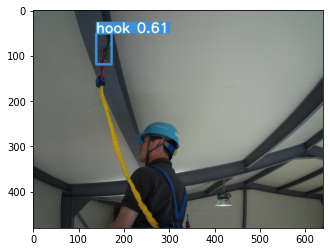

In [ ]:
disp_images = glob('inference/single_output/*')
print(disp_images)
img = plt.imread(disp_images[0])
plt.imshow(img)

## Predict image in folders

In [ ]:
output = !python detect.py --source ../data-preprocessed/helmet/images/valid/ --weights './runs/exp6_HELMET/weights/best_HELMET.pt' --output 'inference/output' --device 'cpu'

# output = !python detect.py --source ../imgs/images/valid/ --weights './runs/exp4_HOOK/weights/best_HOOK.pt' --output 'inference/output' --device 'cpu'
# output = !python '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/detect.py' --source '/content/inputs/' --weights '/content/drive/My Drive/Machine Learning Projects/YOLO/SOURCE/best_BCCM.pt' --output '/content/OUTPUTS/' --device 'cpu'

# print(output)

In [10]:
import numpy as np
disp_images = glob('inference/output/*')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
disp_images = glob('inference/output/*')

img = plt.imread(disp_images[5])
plt.imshow(img)

IndexError: ignored

In [ ]:
# img = plt.imread(disp_images[1])
# plt.imshow(img)